In [1]:
import tensorflow as tf

tf.__version__

'2.5.0'

# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터를 정의

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델)을 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    
3. 모델 컴파일
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train.
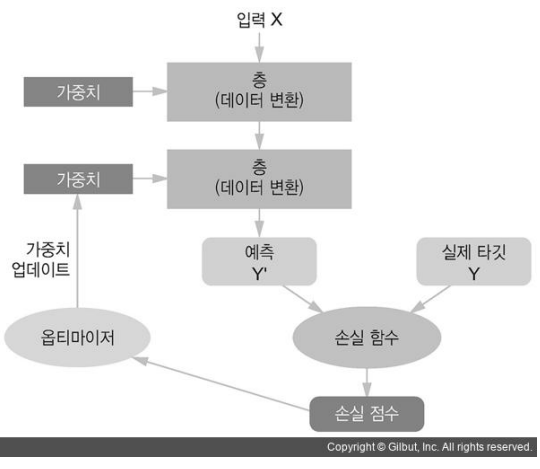

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [2]:
import tensorflow as tf
from tensorflow import keras

import 

In [3]:
tf.__version__

'2.5.0'

In [5]:
keras.__version__

'2.5.0'

In [7]:
## MNIST Dataset을 loading - keras의 toy dataset으로 제공
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 7s 1us/step


In [8]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [9]:
print(train_image.shape, train_label.shape)
print(test_image.shape, test_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
train_image.dtype

dtype('uint8')

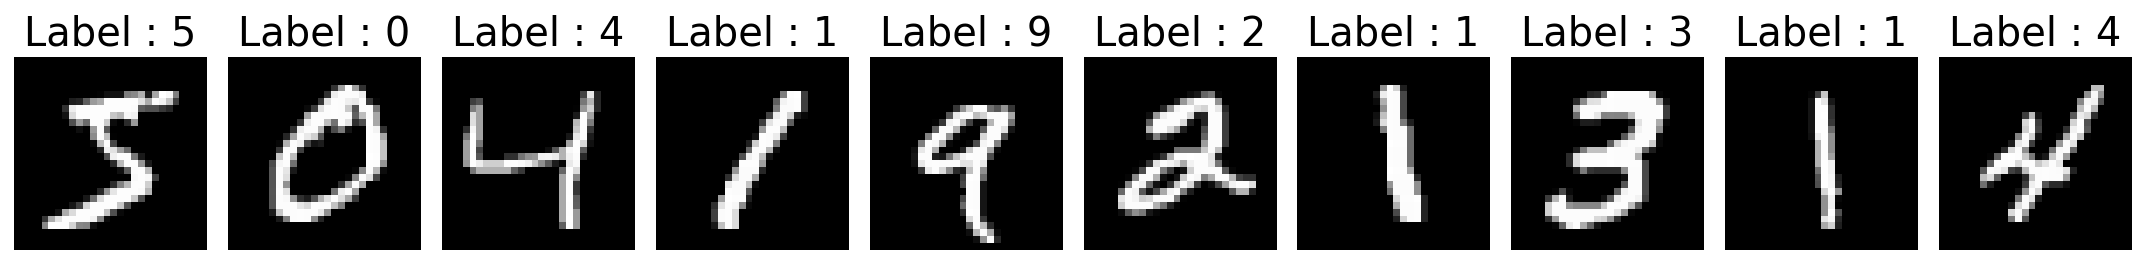

In [13]:
# 10개 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for idx in range(10):
    plt.subplot(1,10, idx+1)
    plt.imshow(train_image[idx], cmap='gray')
    plt.title(f'Label : {train_label[idx]}', fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 신경망 구현

## network : 전체 모델 구조 만들기

In [39]:
#모델(네트워크)
model = keras.Sequential()

#모델에 layer들을 추가
    #layer : 일하는 것(unit)들을 모아놓은 집합
#입력 레이어
model.add(keras.layers.InputLayer((28,28))) #첫layer는 Input layer (입력데이터의 shpae를 지정)

#hidden layer
model.add(keras.layers.Flatten()) # 28*28 입력데이터를 1차원배열(784,)로 변환
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))

#출력 레이어
model.add(keras.layers.Dense(units=10, activation='softmax'))
    #마지막 레이어는 보낼 곳이 없으므로 출력결과가 전체 모델의 출력결과!
    

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## 컴파일 단계
- 구축된 모델에 학습을 위한 추가 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [41]:
model.compile(optimizer='adam',#최적화 함수 : 모델의 파라미터(weight)들을 업데이트
              loss='categorical_crossentropy', #Loss(손실, 오차)를 계산하는 함수 설정. categorical_crossentropy : 다중 분류의 손실함수
              metrics = ['accuracy']
             )



## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다.(scaling)
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류일 경우 One Hot Encoding 한다.
    - tensorflow.keras 의 to_categorical() 함수 이용

In [42]:
np.min(train_image), np.max(train_image), train_image.dtype

(0, 255, dtype('uint8'))

In [43]:
X_train = (train_image / 255.0).astype(np.float32)
X_train.dtype

dtype('float32')

In [44]:
X_test = (test_image / 255.0).astype(np.float32)


In [45]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [46]:
train_label, np.unique(train_label)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [47]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [48]:
print(y_train.shape, train_label.shape)
y_train[:5]

(60000, 10) (60000,)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 학습 (fit)

In [49]:
#model.fit() :  History 객체 반환
#History : 
hist= model.fit(X_train, y_train, #train_dataset - x, y
                epochs=10,  #epoch 수 - train dataset을 몇번 학습할지 지정
                batch_size=100,  #파라미터(weight-모델의 학습대상)를 몇개의 데이터마다 업데이트할지 설정
                validation_split=0.3 #train set의 30%는 검증 데이터 셋으로 사용
                )
#학습데이터 : 60000개, batch_size = 100
#1 epoch 당 600step

Epoch 1/10
420/420 [==============================] - 2s 4ms/step - loss: 0.3666 - accuracy: 0.8970 - val_loss: 0.1894 - val_accuracy: 0.9447
Epoch 2/10
420/420 [==============================] - 2s 4ms/step - loss: 0.1480 - accuracy: 0.9571 - val_loss: 0.1440 - val_accuracy: 0.9575
Epoch 3/10
420/420 [==============================] - 2s 4ms/step - loss: 0.1021 - accuracy: 0.9695 - val_loss: 0.1264 - val_accuracy: 0.9607
Epoch 4/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0778 - accuracy: 0.9767 - val_loss: 0.1177 - val_accuracy: 0.9662
Epoch 5/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9827 - val_loss: 0.1062 - val_accuracy: 0.9696
Epoch 6/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.1030 - val_accuracy: 0.9719
Epoch 7/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0386 - accuracy: 0.9889 - val_loss: 0.1039 - val_accuracy: 0.9720
Epoch 

In [51]:
hist.history['loss']

[0.3665866255760193,
 0.1479969620704651,
 0.1020997166633606,
 0.07782180607318878,
 0.05954424664378166,
 0.04890507459640503,
 0.0385504849255085,
 0.028498107567429543,
 0.025438247248530388,
 0.02221444994211197]

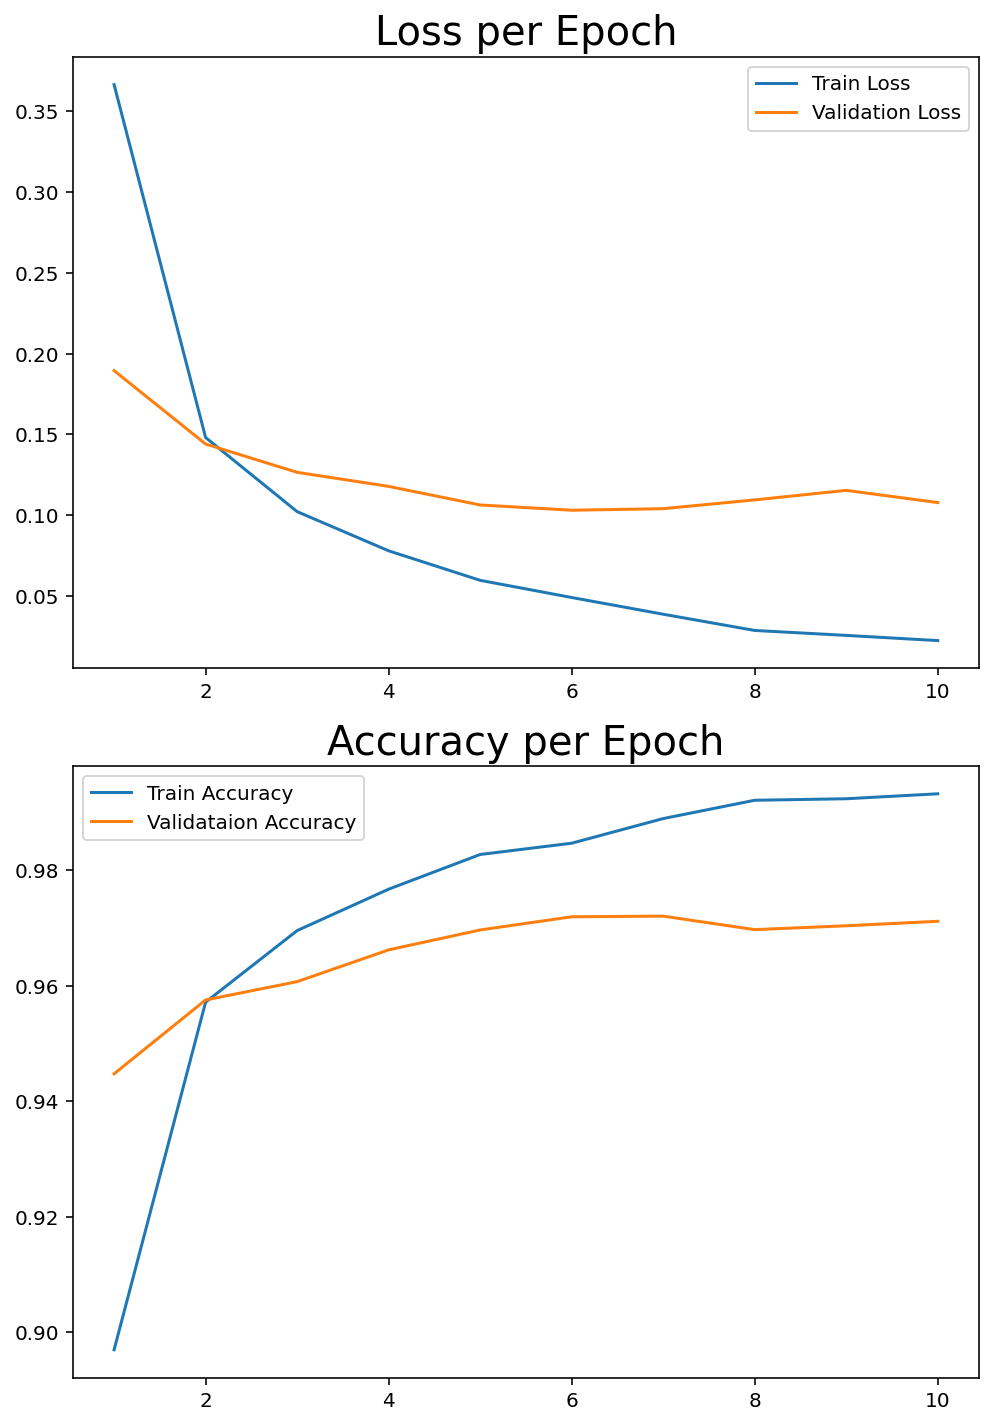

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,11), hist.history['loss'], label='Train Loss')
plt.plot(range(1,11), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch', fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,11), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,11), hist.history['val_accuracy'], label='Validataion Accuracy')
plt.title('Accuracy per Epoch', fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()

## 테스트셋 평가

In [58]:
model.evaluate(X_test, y_test) #매개변수(X, y)  #반환 : Loss [, metrics 설정한 평가지표값 ]

313/313 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9750


[0.08609355986118317, 0.9750000238418579]

In [60]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9750


### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`
-     

In [61]:
# 새로운 이미지 >> 1. size를 28 * 28,  2. 0~1 scaling
new_image = X_test[:5]
new_image.shape

(5, 28, 28)

In [62]:
result = model.predict(new_image)

In [63]:
result.shape

(5, 10)

In [64]:
result[0]
# 99%의 확률로 7로 예측하였다

array([3.7274733e-06, 2.1425851e-06, 5.3685166e-05, 2.5665492e-03,
       1.2582034e-09, 1.0739131e-07, 4.9356484e-11, 9.9532914e-01,
       4.4654735e-04, 1.5980598e-03], dtype=float32)

In [65]:
result_label = model.predict_classes(new_image)

C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [66]:
result_label

array([7, 2, 1, 0, 4], dtype=int64)

In [69]:
result_label2 = np.argmax(result, axis=-1)

In [70]:
result_label2

array([7, 2, 1, 0, 4], dtype=int64)